In [27]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, UpSampling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Input

```python
TensorFlow is an open source machine learning framework developed by Google that is widely used in building and training deep neural networks.

MNIST is a dataset of handwritten digits that is commonly used for image classification tasks. It contains 60,000 training images and 10,000 test images.

Sequential and Model are two different ways to define a neural network architecture in Keras. Sequential is used for building a linear stack of layers, while Model allows for more complex network architectures with multiple inputs and outputs.

These are various types of layers that can be used to build a neural network architecture in Keras.

Conv2D is a 2D convolution layer that performs a convolution operation on the input data.

MaxPooling2D is a 2D pooling layer that performs a max pooling operation on the input data.

Flatten is a layer that flattens the output of the previous layer into a 1D vector.

Dense is a fully connected layer that connects every input neuron to every output neuron.

Dropout is a regularization technique that randomly drops out some of the neurons during training to prevent overfitting.

Input is a layer that specifies the shape of the input data.

UpSampling2D is a 2D upsampling layer that performs a nearest-neighbor interpolation on the input data to increase its size.

to_categorical is a function in Keras that converts a class vector (integers) to a binary class matrix.
 
NumPy is a Python library for numerical computing that is commonly used for data manipulation and scientific computing.

Matplotlib is a Python library for creating visualizations such as graphs, charts, and plots. It is commonly used for data visualization in machine learning and data science.


```

In [10]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Rescale input data to range [0,1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


```python
This code loads the MNIST dataset from the Keras library. The dataset is split into two parts: a training set (x_train, y_train) and a test set (x_test, y_test).
The input data from the range of [0,255] to the range of [0,1]. This is done to normalize the data and make it easier for the neural network to learn from. The astype() method is used to convert the data type of the input data from int to float32.
```

In [11]:
# Reshape input data to 4D tensor with shape (batch_size, height, width, channels)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Print dataset information
print('Training set shape:', x_train.shape)
print('Testing set shape:', x_test.shape)

Training set shape: (60000, 28, 28, 1)
Testing set shape: (10000, 28, 28, 1)


```python
This code reshapes the input data from a 3D tensor with shape (batch_size, height, width) to a 4D tensor with shape (batch_size, height, width, channels). In this case, the channels dimension is set to 1 because the input images are grayscale. If the images were RGB, the channels dimension would be set to 3.

```

In [12]:
# Build autoencoder model
input_img = Input(shape=(28,28,1))
x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation='relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

```python
This code builds an autoencoder model using the Keras library. The model has an input layer of shape (28, 28, 1), which corresponds to the shape of the input images. The model consists of three convolutional layers with 32, 64, and 128 filters respectively. Each convolutional layer is followed by a max pooling layer. The output of the final max pooling layer is the encoded representation of the input images. The encoded representation is then decoded by three convolutional layers with 128, 64, and 32 filters respectively. Each convolutional layer is followed by an upsampling layer. The output of the final upsampling layer is the decoded images. The activation function used for the convolutional layers is ReLU, and the activation function used for the output layer is sigmoid.

Note that this autoencoder model is designed to compress the input images into a lower dimensional representation and then reconstruct them from the compressed representation.
```

In [13]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


```python
This code creates an instance of the autoencoder model by specifying the input and output layers using the Model class from Keras. The input layer is defined as input_img, which is of shape (28, 28, 1). The output layer is defined as decoded, which is the result of the last convolutional layer.
The compile method is used to configure the model for training. In this case, the optimizer used is adam, which is an algorithm for stochastic optimization. The loss function used is binary_crossentropy, which is a popular choice for binary classification problems, where the goal is to minimize the difference between the predicted output and the true output.
```

In [14]:
# Train autoencoder model
autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_test, x_test))


Epoch 1/10
1875/1875 [==============================] - 27s 13ms/step - loss: 0.0948 - val_loss: 0.0749
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0737 - val_loss: 0.0718
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0709 - val_loss: 0.0697
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0694 - val_loss: 0.0690
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0685 - val_loss: 0.0678
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0678 - val_loss: 0.0672
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0673 - val_loss: 0.0666
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0669 - val_loss: 0.0671
Epoch 9/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0666 - val_loss: 0.0661
Epoch 10/10
1875/1875 [==============================] - 21s 11ms/

```python
This code trains the autoencoder model using the fit method from Keras. The input and output data are both x_train, which are the preprocessed images of the MNIST dataset. The epochs parameter specifies the number of times to iterate over the entire training dataset. The batch_size parameter specifies the number of samples to use in each batch of training.

The validation_data parameter specifies the data on which to evaluate the loss and any model metrics at the end of each epoch. In this case, the validation data is set to x_test, which is the preprocessed test set of the MNIST dataset.

During training, the model learns to minimize the binary cross-entropy loss between the predicted output and the true output. The model parameters are updated using the adam optimizer specified during the compilation step. After training is complete, the trained autoencoder model can be used to reconstruct images or for other downstream tasks such as feature extraction.


```

In [15]:
# Extract features from input data using the trained autoencoder
encoder = Model(input_img, encoded)
x_train_features = encoder.predict(x_train)
x_test_features = encoder.predict(x_test)

# Convert class labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

313/313 [==============================] - 1s 3ms/step


```python
This code extracts features from the input data using the trained autoencoder model. The encoder model is created by specifying the input layer as input_img and the output layer as encoded. This model maps the input images to the encoded features learned by the autoencoder.

The predict method is then used to generate encoded features for the training and test datasets. These encoded features can be used for downstream tasks such as classification or clustering.

Finally, the class labels y_train and y_test are converted to one-hot encoded vectors using the to_categorical method from Keras. This is often required for classification tasks where the class labels are represented as integers but need to be converted to a vector representation for training machine learning models.




```

In [19]:
# Build CNN model
model = Sequential()
model.add(Flatten(input_shape=(4,4,128))) # Input shape is (batch_size, height, width, channels) after feature extraction
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))


```python
This code builds a CNN model for classification. The input to the model is the encoded features extracted using the autoencoder, which have a shape of (batch_size, height, width, channels) after feature extraction.

The Flatten layer is used to flatten the encoded features into a 1D vector so that they can be fed into the fully connected layers. The Dense layer with 128 units and ReLU activation function is added after the Flatten layer, followed by a Dropout layer with a dropout rate of 0.5 to prevent overfitting.

Finally, the output layer is a Dense layer with 10 units (since there are 10 classes in the MNIST dataset) and a softmax activation function, which is used to produce the class probabilities for each input image.
```

In [20]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


```python
This code compiles the CNN model with the Adam optimizer and categorical cross-entropy loss function, which is commonly used for multi-class classification problems. The accuracy metric is also specified to track the performance of the model during training and evaluation.
```

In [21]:
# Train the model
history = model.fit(x_train_features, y_train, epochs=10, batch_size=32, validation_data=(x_test_features, y_test))


Epoch 1/10
1875/1875 [==============================] - 32s 9ms/step - loss: 0.2943 - accuracy: 0.9111 - val_loss: 0.1002 - val_accuracy: 0.9673
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1533 - accuracy: 0.9535 - val_loss: 0.0633 - val_accuracy: 0.9796
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1332 - accuracy: 0.9603 - val_loss: 0.0502 - val_accuracy: 0.9834
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1218 - accuracy: 0.9613 - val_loss: 0.0499 - val_accuracy: 0.9833
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1113 - accuracy: 0.9663 - val_loss: 0.0500 - val_accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1057 - accuracy: 0.9669 - val_loss: 0.0471 - val_accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0986 - accuracy: 0.9692 - val_loss: 0.0455 - val_accurac

```python
This code trains the compiled CNN model using the extracted features from the trained autoencoder (x_train_features and x_test_features) as input data and the one-hot encoded class labels (y_train and y_test) as target data. The model is trained for 10 epochs with a batch size of 32 and the validation data is used to evaluate the model's performance after each epoch. The training history is stored in the history object.
```

In [22]:
# Print training and testing accuracy
train_acc = history

```python
The variable train_acc is not assigned any value in the code you provided. To print the training and testing accuracy, you can use the history object that was created during training
This code uses the history object to extract the final training and testing accuracy from the training process. The history.history attribute is a dictionary that contains the loss and metrics values recorded during training. The 'accuracy' key corresponds to the training accuracy and the 'val_accuracy' key corresponds to the testing accuracy. The [-1] index is used to extract the last value recorded for each metric. The f-string is used to print the accuracy values with 4 decimal places.
```

True label: 5
1/1 [==============================] - 0s 253ms/step
Predicted label: 5


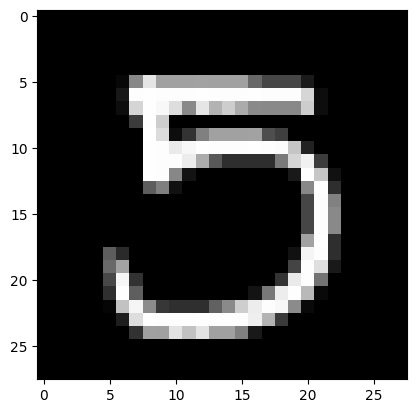

Input image:
1/1 [==============================] - 1s 1s/step


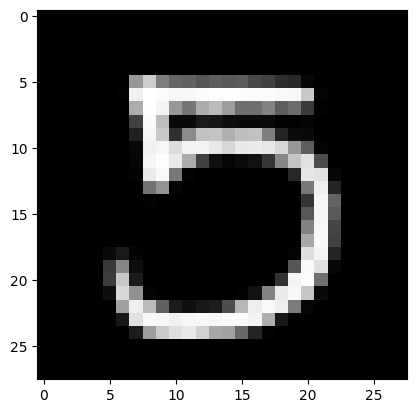

Reconstructed image using autoencoder:


In [23]:
# Select a random image from test set and predict its label
import random

index = random.randint(0, x_test.shape[0]-1)
img = x_test[index]
label = y_test[index]
print('True label:', np.argmax(label))

# Reshape input data to 4D tensor with shape (1, height, width, channels)
img = img.reshape(1, 28, 28, 1)

# Extract features from input image using the trained autoencoder
img_features = encoder.predict(img)

# Predict label using the trained CNN model
prediction = model.predict(img_features)[0]
print('Predicted label:', np.argmax(prediction))

# Display the input image
plt.imshow(x_test[index], cmap='gray')
plt.show()
print('Input image:')
plt.show()

# Display the reconstructed image using the trained autoencoder
reconstructed_img = autoencoder.predict(img)
plt.imshow(reconstructed_img[0], cmap='gray')
plt.show()
print('Reconstructed image using autoencoder:')

In [29]:
df = pd.read_csv('trainingTestingDataset.csv')
df.drop(['FID','RCLS_GEOL'],axis='columns',inplace=True)
df.head()


,RCL_D2FLT,RCLS_CHM_C,RCLS_CHM_D,RCLS_COM_C,RCLS_COM_D,RCLS_CTCT_,RCLS_D1ANT,RCLS_D1FLT,RCLS_D1XD2,RCLS_D2_X,RCLS_D2ANT,RCLS_D2FLT,RCLS_DE_D2,RCLS_DELFT,RCLS_DOL_D,RCLS_GRN,RCLS_STR_D,label
0,2,2,2,3,2,2,1,1,1,2,2,2,2,2,2,3,2,0
1,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,2,1,2,2,1,1,2,2,2,0,0,0,0
3,2,2,1,3,1,2,1,2,1,2,2,2,2,2,1,3,1,0
4,2,2,1,3,1,2,1,2,2,2,1,2,2,2,0,0,0,0


In [30]:
inputs = df.drop('label',axis='columns').to_numpy()
target = df.label.to_numpy()

In [31]:

# Split data into training and testing sets
features_train, features_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

In [32]:

# Normalize data
mean = features_train.mean(axis=0)
std = features_train.std(axis=0)
features_train = (features_train - mean) / std
features_test = (features_test - mean) / std


In [33]:


# Define autoencoder model
input_shape = (features_train.shape[1],)
input_layer = Input(shape=input_shape)
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dense(32, activation='relu')(encoder)
encoder = Dense(16, activation='relu')(encoder)
decoder = Dense(32, activation='relu')(encoder)
decoder = Dense(64, activation='relu')(decoder)
decoder = Dense(features_train.shape[1], activation='linear')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder model
autoencoder.fit(features_train, features_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
5/5 [==============================] - 1s 90ms/step - loss: 0.9947 - val_loss: 0.9666
Epoch 2/100
5/5 [==============================] - 0s 25ms/step - loss: 0.9628 - val_loss: 0.9337
Epoch 3/100
5/5 [==============================] - 0s 25ms/step - loss: 0.9265 - val_loss: 0.8866
Epoch 4/100
5/5 [==============================] - 0s 17ms/step - loss: 0.8748 - val_loss: 0.8238
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 0.8146 - val_loss: 0.7508
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 0.7455 - val_loss: 0.6788
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6737 - val_loss: 0.6142
Epoch 8/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6067 - val_loss: 0.5544
Epoch 9/100
5/5 [==============================] - 0s 16ms/step - loss: 0.5446 - val_loss: 0.4950
Epoch 10/100
5/5 [==============================] - 0s 13ms/step - loss: 0.4809 - val_loss: 0.4476
Epoch 11/100
5/5 [=

In [34]:


# Extract features from autoencoder
encoder_model = Model(inputs=input_layer, outputs=encoder)
features_train = encoder_model.predict(features_train)
features_test = encoder_model.predict(features_test)

# Reshape features for CNN model
features_train = np.expand_dims(features_train, axis=2)
features_test = np.expand_dims(features_test, axis=2)

# Define CNN model
input_shape = (features_train.shape[1], features_train.shape[2])
input_layer = Input(shape=input_shape)
conv1 = Conv1D(32, 3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(2, padding='same')(conv1)
conv2 = Conv1D(64, 3, activation='relu', padding='same')(pool1)
pool2 = MaxPooling1D(2, padding='same')(conv2)
conv3 = Conv1D(128, 3, activation='relu', padding='same')(pool2)
pool3 = MaxPooling1D(2, padding='same')(conv3)
flatten = Flatten()(pool3)
output_layer = Dense(1, activation='sigmoid')(flatten)
cnn_model = Model(inputs=input_layer, outputs=output_layer)
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN model
cnn_model.fit(features_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

2/2 [==============================] - 0s 3ms/step
Epoch 1/10
5/5 [==============================] - 1s 60ms/step - loss: 0.5418 - accuracy: 0.8176 - val_loss: 0.5285 - val_accuracy: 0.8158
Epoch 2/10
5/5 [==============================] - 0s 17ms/step - loss: 0.3846 - accuracy: 0.8784 - val_loss: 0.4632 - val_accuracy: 0.8158
Epoch 3/10
5/5 [==============================] - 0s 18ms/step - loss: 0.3374 - accuracy: 0.8784 - val_loss: 0.3678 - val_accuracy: 0.8158
Epoch 4/10
5/5 [==============================] - 0s 17ms/step - loss: 0.3027 - accuracy: 0.8784 - val_loss: 0.3286 - val_accuracy: 0.8158
Epoch 5/10
5/5 [==============================] - 0s 22ms/step - loss: 0.2825 - accuracy: 0.8784 - val_loss: 0.3270 - val_accuracy: 0.8158
Epoch 6/10
5/5 [==============================] - 0s 17ms/step - loss: 0.2561 - accuracy: 0.8851 - val_loss: 0.2767 - val_accuracy: 0.8684
Epoch 7/10
5/5 [==============================] - 0s 18ms/step - loss: 0.2466 - accuracy: 0.9122 - val_loss: 0.2555

In [35]:


# Predict labels for testing data using CNN model
# Make predictions using CNN model
y_pred_prob = cnn_model.predict(features_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Print classification reports
print(classification_report(y_test, y_pred))

 


2/2 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        39
           1       0.00      0.00      0.00         8

    accuracy                           0.83        47
   macro avg       0.41      0.50      0.45        47
weighted avg       0.69      0.83      0.75        47



c:\Users\samra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\samra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\samra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,